# Proximity

Plot histogram for proxity definitions: 

- absolute (in words, alpha = -1): $CPI_{a,b}=\delta_d(a,b)^{-\alpha}$
- relative (with alpha = -1): $CPI_{a,b}=\frac{\delta_d(a,b)^{-\alpha}}{|d|}$
- structure (four levels: paragraph, subsection, section, artile): $CPI_{a,b}=\{1/4, 1/8, 1/12, 1/20\}$

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

from tabulate import tabulate
import pandas as pd
from IPython.display import display


In [11]:
# Number of "See also" articles for evaluation (used to calculate average MAP)
"""
hdfs dfs -getmerge $SEEALSO_PATH/for_$WIKI/from_simplewiki tmp/sa_${WIKI}_simplewiki
hdfs dfs -getmerge $SEEALSO_PATH/for_$WIKI/from_dewiki tmp/sa_${WIKI}_dewiki
hdfs dfs -getmerge $SEEALSO_PATH/for_$WIKI/from_enwiki tmp/sa_${WIKI}_enwiki
wc -l tmp/sa_${WIKI}_simplewiki
wc -l tmp/sa_${WIKI}_dewiki
wc -l tmp/sa_${WIKI}_enwiki
"""
simplewiki_sa_count = 6173 + 53 + 23178
dewiki_sa_count = 4106 + 5072 + 157171


In [12]:
# Simplewiki
# Alphas {0.5,0.6,0.7,0.8,0.85,0.9,1.0}

alphas = [
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.5,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 136560821,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1108.881753168118,
    "map": 1165.1277848216496,
    "article_count": 87058,
    "top_rec_title": "Americans",
    "top_rec_count": 3240,
    "distinct_rec_count": 50146
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.6,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 145973490,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1151.431905985979,
    "map": 1211.4330121945845,
    "article_count": 87058,
    "top_rec_title": "Americans",
    "top_rec_count": 2352,
    "distinct_rec_count": 52651
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.7,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 151992687,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1164.2589845555576,
    "map": 1226.0404082244816,
    "article_count": 87058,
    "top_rec_title": "Americans",
    "top_rec_count": 1617,
    "distinct_rec_count": 54509
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.8,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 153956932,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1174.266693598059,
    "map": 1236.1736463675115,
    "article_count": 87058,
    "top_rec_title": "Americans",
    "top_rec_count": 998,
    "distinct_rec_count": 55796
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.85,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 153584397,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1169.646587682732,
    "map": 1232.000607410281,
    "article_count": 87058,
    "top_rec_title": "2014",
    "top_rec_count": 930,
    "distinct_rec_count": 56252
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.9,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 153309236,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1175.477717485352,
    "map": 1237.395097001262,
    "article_count": 87058,
    "top_rec_title": "2014",
    "top_rec_count": 920,
    "distinct_rec_count": 56708
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 1,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 151979277,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1169.6276540984463,
    "map": 1230.0456468899692,
    "article_count": 87058,
    "top_rec_title": "2014",
    "top_rec_count": 897,
    "distinct_rec_count": 57354
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 1.1,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 150856440,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1153.2913853671791,
    "map": 1212.64863741796,
    "article_count": 87058,
    "top_rec_title": "2015",
    "top_rec_count": 876,
    "distinct_rec_count": 57786
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 1.2,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 148414310,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1141.4634813267749,
    "map": 1200.383828615652,
    "article_count": 87058,
    "top_rec_title": "2015",
    "top_rec_count": 868,
    "distinct_rec_count": 58159
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 1.3,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 144436979,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1123.0429125437051,
    "map": 1180.2948074516298,
    "article_count": 87058,
    "top_rec_title": "2015",
    "top_rec_count": 860,
    "distinct_rec_count": 58430
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 1.5,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 141321011,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1098.6348028480957,
    "map": 1154.0712838398713,
    "article_count": 87058,
    "top_rec_title": "2015",
    "top_rec_count": 839,
    "distinct_rec_count": 58779
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 2,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 133910976,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1067.8067293964934,
    "map": 1119.8894405469987,
    "article_count": 87058,
    "top_rec_title": "2015",
    "top_rec_count": 814,
    "distinct_rec_count": 59140
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 0.5,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 111240464,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1108.881753168118,
    "map": 1165.1277848216496,
    "article_count": 87058,
    "top_rec_title": "Americans",
    "top_rec_count": 3592,
    "distinct_rec_count": 50219
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 0.6,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 120768742,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1151.431905985979,
    "map": 1211.4330121945845,
    "article_count": 87058,
    "top_rec_title": "Americans",
    "top_rec_count": 2821,
    "distinct_rec_count": 52960
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 0.7,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 125432198,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1164.2589845555576,
    "map": 1226.0404082244816,
    "article_count": 87058,
    "top_rec_title": "Americans",
    "top_rec_count": 2120,
    "distinct_rec_count": 54944
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 0.8,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 126915229,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1174.266693598059,
    "map": 1236.1736463675115,
    "article_count": 87058,
    "top_rec_title": "Americans",
    "top_rec_count": 1531,
    "distinct_rec_count": 56406
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 0.85,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 126995706,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1169.646587682732,
    "map": 1232.000607410281,
    "article_count": 87058,
    "top_rec_title": "Americans",
    "top_rec_count": 1289,
    "distinct_rec_count": 56943
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 0.9,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 126628745,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1175.477717485352,
    "map": 1237.395097001262,
    "article_count": 87058,
    "top_rec_title": "Americans",
    "top_rec_count": 1128,
    "distinct_rec_count": 57425
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 1,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 125803662,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1169.6276540984463,
    "map": 1230.0456468899692,
    "article_count": 87058,
    "top_rec_title": "Americans",
    "top_rec_count": 931,
    "distinct_rec_count": 58245
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 1.1,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 124659934,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1153.2913853671791,
    "map": 1212.64863741796,
    "article_count": 87058,
    "top_rec_title": "2014",
    "top_rec_count": 821,
    "distinct_rec_count": 58828
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 1.2,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 121856805,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1141.4634813267749,
    "map": 1200.383828615652,
    "article_count": 87058,
    "top_rec_title": "2014",
    "top_rec_count": 793,
    "distinct_rec_count": 59354
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 1.3,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 119431026,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1123.0429125437051,
    "map": 1180.2948074516298,
    "article_count": 87058,
    "top_rec_title": "2014",
    "top_rec_count": 764,
    "distinct_rec_count": 59756
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 1.5,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 116410370,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1098.6348028480957,
    "map": 1154.0712838398713,
    "article_count": 87058,
    "top_rec_title": "2014",
    "top_rec_count": 717,
    "distinct_rec_count": 60193
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 2,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 110779298,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "sa_recs_count": 75323,
    "mrr": 1067.8067293964934,
    "map": 1119.8894405469987,
    "article_count": 87058,
    "top_rec_title": "2014",
    "top_rec_count": 636,
    "distinct_rec_count": 60699
  },
    {
    "equation": "x",
    "proximity": "str",
    "alpha": 1,
    "sa_recs_count": 75323,
    "cs_recs_count": 260349,
    "impressions": 1380497539,
    "total_clicks": 1383129245,
    "top_k_clicks": 120569294,
    "opt_clicks": 685788110,
    "seealso_count": 52062,
    "mrr": 1169.6276540984463,
    "map": 1230.0456468899692,
    "article_count": 87058,
    "top_rec_title": "Actor",
    "top_rec_count": 2501,
    "distinct_rec_count": 43630
  }
]

#######


In [23]:
alphas_de = [
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.5,
    "cs_recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 448340227,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8567.680267182504,
    "map": 9032.255084340723,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 6169,
    "distinct_rec_count": 514869
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.6,
    "cs_recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 474712509,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8870.245534695783,
    "map": 9358.391090046835,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 4165,
    "distinct_rec_count": 551698
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.7,
    "cs_recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 491281064,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8989.503601290264,
    "map": 9483.145442357158,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 2823,
    "distinct_rec_count": 577493
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.8,
    "cs_recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 497979537,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8997.634453437518,
    "map": 9485.897136105234,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 2049,
    "distinct_rec_count": 594598
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.85,
    "cs_recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 499953870,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8986.318356191972,
    "map": 9470.022915621856,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 1810,
    "distinct_rec_count": 601012
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.9,
    "cs_recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 499838333,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8949.025996837456,
    "map": 9426.370524822765,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 1610,
    "distinct_rec_count": 606474
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 1,
    "cs_recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 496058253,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8864.73919307976,
    "map": 9328.824008934782,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 1354,
    "distinct_rec_count": 614363
  }
]

alphas_de = [
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.5,
    "cs_recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 448340227,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8567.680267182504,
    "map": 9032.255084340723,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 6169,
    "distinct_rec_count": 514869
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.6,
    "cs_recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 474712509,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8870.245534695783,
    "map": 9358.391090046835,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 4165,
    "distinct_rec_count": 551698
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.7,
    "cs_recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 491281064,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8989.503601290264,
    "map": 9483.145442357158,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 2823,
    "distinct_rec_count": 577493
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.8,
    "cs_recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 497979537,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8997.634453437518,
    "map": 9485.897136105234,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 2049,
    "distinct_rec_count": 594598
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.85,
    "cs_recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 499953870,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8986.318356191972,
    "map": 9470.022915621856,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 1810,
    "distinct_rec_count": 601012
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.9,
    "cs_recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 499838333,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8949.025996837456,
    "map": 9426.370524822765,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 1610,
    "distinct_rec_count": 606474
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 1,
    "cs_recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 496058253,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8864.73919307976,
    "map": 9328.824008934782,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 1354,
    "distinct_rec_count": 614363
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 1.1,
    "cs_recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 489737414,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8763.120500308843,
    "map": 9214.600061997739,
    "article_count": 702542,
    "top_rec_title": "Frankreich",
    "top_rec_count": 1236,
    "distinct_rec_count": 619947
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 1.2,
    "cs_recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 482701402,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8658.015483080231,
    "map": 9097.201361091906,
    "article_count": 702542,
    "top_rec_title": "Distinct recommendations",
    "top_rec_count": 623843,
    "distinct_rec_count": 1224
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 1.3,
    "cs_recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 473904985,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8528.873462020476,
    "map": 8956.963671650612,
    "article_count": 702542,
    "top_rec_title": "Frankreich",
    "top_rec_count": 1212,
    "distinct_rec_count": 626799
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 1.5,
    "cs_recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 456654159,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8338.745117708373,
    "map": 8751.658808341894,
    "article_count": 702542,
    "top_rec_title": "Frankreich",
    "top_rec_count": 1183,
    "distinct_rec_count": 630233
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 2,
    "cs_recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 414063018,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8002.021009594046,
    "map": 8382.571615265413,
    "article_count": 702542,
    "top_rec_title": "Frankreich",
    "top_rec_count": 1166,
    "distinct_rec_count": 633291
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 0.5,
    "cs_recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 400546465,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8567.680267182504,
    "map": 9032.255084340723,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 6182,
    "distinct_rec_count": 501924
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 0.6,
    "cs_recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 427170907,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8870.245534695783,
    "map": 9358.391090046835,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 4561,
    "distinct_rec_count": 543381
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 0.7,
    "cs_recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 440720375,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8989.503601290264,
    "map": 9483.145442357158,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 3341,
    "distinct_rec_count": 574361
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 0.8,
    "cs_recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 442443018,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8997.634453437518,
    "map": 9485.897136105234,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 2358,
    "distinct_rec_count": 599042
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 0.85,
    "cs_recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 439562924,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8986.318356191972,
    "map": 9470.022915621856,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 2017,
    "distinct_rec_count": 609394
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 0.9,
    "cs_recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 435128961,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8949.025996837456,
    "map": 9426.370524822765,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 1729,
    "distinct_rec_count": 618851
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 1,
    "cs_recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 425465449,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8864.73919307976,
    "map": 9328.824008934782,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 1340,
    "distinct_rec_count": 633653
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 1.1,
    "cs_recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 412668349,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8763.120500308843,
    "map": 9214.600061997739,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 1151,
    "distinct_rec_count": 644339
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 1.2,
    "cs_recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 398013744,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8658.015483080231,
    "map": 9097.201361091906,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 1042,
    "distinct_rec_count": 652342
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 1.3,
    "cs_recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 385335075,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8528.873462020476,
    "map": 8956.963671650612,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 982,
    "distinct_rec_count": 658394
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 1.5,
    "cs_recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 364252414,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8338.745117708373,
    "map": 8751.658808341894,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 927,
    "distinct_rec_count": 666516
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 2,
    "cs_recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 327664854,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8002.021009594046,
    "map": 8382.571615265413,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 871,
    "distinct_rec_count": 676239
  },
  {
    "equation": "x",
    "proximity": "str",
    "alpha": 1,
    "cs_recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": -265130845,
    "top_k_clicks": 422271923,
    "opt_clicks": 1777685045,
    "seealso_count": 342527,
    "sa_recs_count": 465443,
    "mrr": 8864.73919307976,
    "map": 9328.824008934782,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 5423,
    "distinct_rec_count": 508524
  }
]


In [24]:
def get_eval_df(data, seealso_count):
    df = pd.DataFrame(data)
        
    # Set label (without eq)
    df['label'] = df.apply(lambda r: '%s, a=%.2f' % (r['proximity'], r['alpha']), axis=1)

    # Compute MAP
    df['avg_map'] = df.apply(lambda r: r['map'] / seealso_count, axis=1)
    
    # Compute CTR
    #df['ctr'] = df.apply(lambda r: r['top_k_clicks'] / r['opt_clicks'], axis=1)
    df['ctr'] = df['top_k_clicks'] / df['opt_clicks']
    
    # Compute goal function
    df['f'] = df.apply(lambda r: 0.45 * r['ctr'] + 0.45 * r['avg_map'] + 0.05 * (1/r['top_rec_count']) + 0.05 * (r['distinct_rec_count']/r['article_count']), axis=1)

    # Find best run
    df['f_max'] = df.apply(lambda r: r['f'] == np.max(df['f']), axis=1)
        
    return df
    
def validate_eval_df(df):
    # Validation: All these fields need to be equal
    for field in ['sa_recs_count','opt_clicks', 'seealso_count']:
        assert len(df) == len(df[df[field] == df[field][0]])
    
def print_eval_table(df, cols=['equation','proximity','alpha','ctr','avg_map','top_rec_count', 'distinct_rec_count', 'f', 'f_max']):
    print(tabulate(df[cols], headers='keys'))
    
    
    
df_alphas = get_eval_df(alphas, simplewiki_sa_count)

print('## simplewiki\n')
print_eval_table(df_alphas)


df_alphas_de = get_eval_df(alphas_de, dewiki_sa_count)

print('\n\n## dewiki\n')
print_eval_table(df_alphas_de)


validate_eval_df(df_alphas)

## simplewiki

    equation    proximity      alpha       ctr    avg_map    top_rec_count    distinct_rec_count          f  f_max
--  ----------  -----------  -------  --------  ---------  ---------------  --------------------  ---------  -------
 0  x           abs             0.5   0.19913   0.0396248             3240                 50146  0.10744    False
 1  x           abs             0.6   0.212855  0.0411996             2352                 52651  0.114325   False
 2  x           abs             0.7   0.221632  0.0416964             1617                 54509  0.118498   False
 3  x           abs             0.8   0.224496  0.042041               998                 55796  0.119942   True
 4  x           abs             0.85  0.223953  0.0418991              930                 56252  0.119633   False
 5  x           abs             0.9   0.223552  0.0420825              920                 56708  0.119536   False
 6  x           abs             1     0.221613  0.0418326       

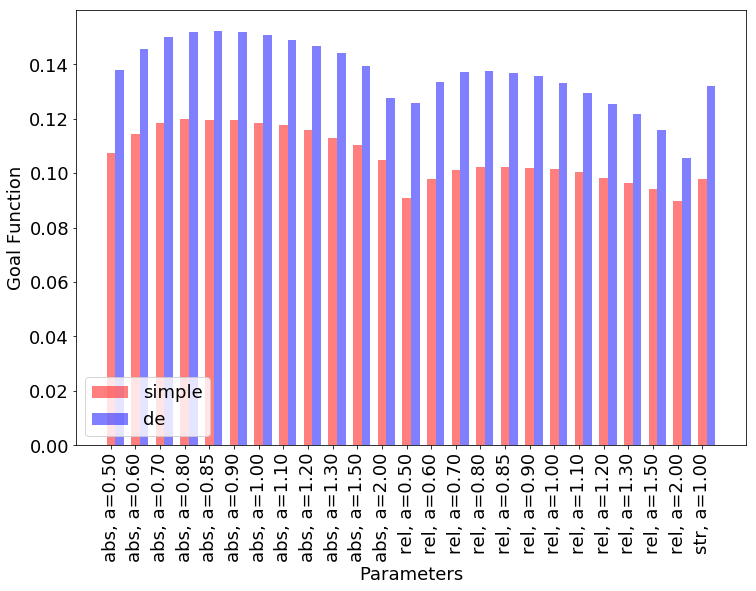

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
rcParams['font.size'] = 18

                             
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(df_alphas.index, df_alphas['f'], width, color='r', alpha=.5, label='simple')

rects2 = ax.bar(df_alphas_de.index + width, df_alphas_de['f'], width, color='b', alpha=.5, label='de')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
#ax.set_title('Scores by alpha, proximity (simplewiki, dewiki)')
#ax.set_xticks(df_alphas.index)
ax.set_xlabel("Parameters")
ax.set_ylabel("Goal Function") 
ax.set_xticklabels(df_alphas['label'], rotation='vertical')
ax.set_xticks(np.arange(len( df_alphas['f'])))

#ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))

# Set marker for maximum
#ax.plot(df_alphas[df_alphas['f'] == np.max(df_alphas['f'])].index, np.max(df_alphas['f']) * 1.05, ls = '-', color='darkred', marker='v', markersize = 6.0)

#ax.annotate( 'max', xy=(2, 0.9), xytext=(2,1.2), ha='center', arrowprops={'shrink':0.05})
#ax.set_ylim([0,1])
ax.legend(loc='lower left')
#plt.savefig("test.svg")
plt.show()

# Why has dewiki a higher CTR? More links the better?

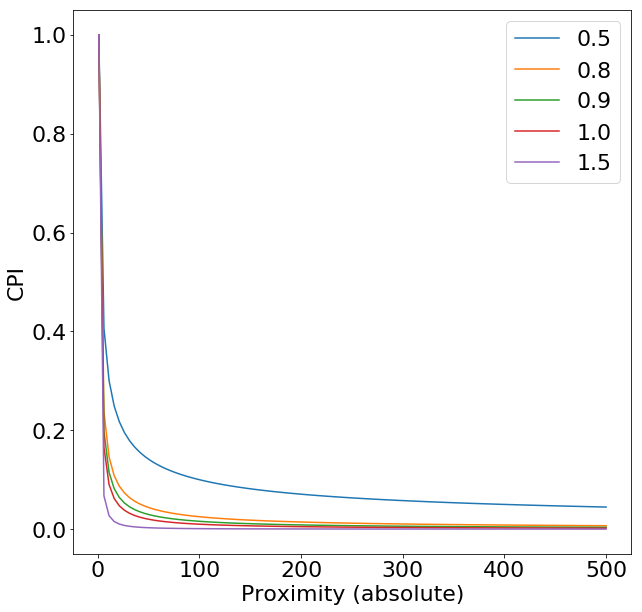

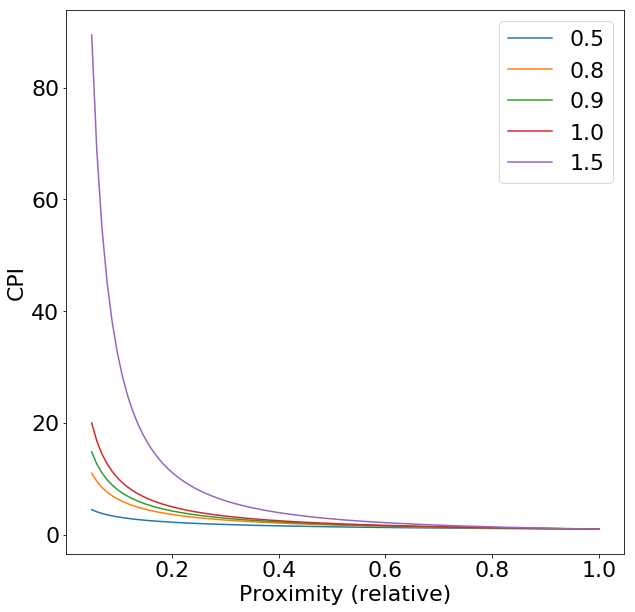

alpha = 0.500000, cpi(mean(abs)) = 0.010170
alpha = 0.500000, cpi(mean(rel)) = 1.415936

alpha = 0.800000, cpi(mean(abs)) = 0.000648
alpha = 0.800000, cpi(mean(rel)) = 1.744496

alpha = 0.900000, cpi(mean(abs)) = 0.000259
alpha = 0.900000, cpi(mean(rel)) = 1.870160

alpha = 1.000000, cpi(mean(abs)) = 0.000103
alpha = 1.000000, cpi(mean(rel)) = 2.004876

alpha = 1.500000, cpi(mean(abs)) = 0.000001
alpha = 1.500000, cpi(mean(rel)) = 2.838777



In [43]:

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
rcParams['font.size'] = 22

# Effect of different alphas values
alphas = [0.5, 0.8, 0.9, 1.0, 1.5]
# absolute proximity (words)
x = np.linspace(1,500,100)

for a in alphas:
    plt.plot(x, np.power(x, -a), label=a)

plt.legend(loc='upper right')
plt.ylabel('CPI')
plt.xlabel('Proximity (absolute)')
plt.show() 

# The lower alpha the closer the proximity needs to be have an effect.
# Mean: 19667.530254;	Min: 1.000000;	Max: 39373.000000

x = np.linspace(0.05,1,100)

for a in alphas:
    plt.plot(x, np.power(x, -a), label=a)

plt.legend(loc='upper right')
plt.ylabel('CPI')
plt.xlabel('Proximity (relative)')
plt.show() 

# Mean: 0.498784;	Min: 0.000030;	Max: 0.999170

for a in alphas:
    print('alpha = %f, cpi(mean(abs)) = %f' % (a, np.power(9667.530254, -a)))
    print('alpha = %f, cpi(mean(rel)) = %f\n' % (a, np.power(0.498784, -a)))
    

In [ ]:
# Backup


alphas_de = [
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.5,
    "recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": 721824577,
    "top_k_clicks": 69945334,
    "opt_clicks": 309860454,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 6169,
    "distinct_rec_count": 514869
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.6,
    "recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": 721217355,
    "top_k_clicks": 74836357,
    "opt_clicks": 309821644,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 4165,
    "distinct_rec_count": 551698
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.7,
    "recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": 721217355,
    "top_k_clicks": 74836357,
    "opt_clicks": 309821644,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 4165,
    "distinct_rec_count": 551698
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.8,
    "recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": 723410200,
    "top_k_clicks": 78988441,
    "opt_clicks": 310852297,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 2049,
    "distinct_rec_count": 594598
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.85,
    "recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": 725269022,
    "top_k_clicks": 79370664,
    "opt_clicks": 312371791,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 1810,
    "distinct_rec_count": 601012
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 0.9,
    "recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": 723873897,
    "top_k_clicks": 79893664,
    "opt_clicks": 311942882,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 1610,
    "distinct_rec_count": 606474
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 1,
    "recs_count": 2105499,
    "impressions": -259810704,
    "total_clicks": 720989776,
    "top_k_clicks": 77886914,
    "opt_clicks": 309718292,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 1354,
    "distinct_rec_count": 614363
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 1.1,
    "recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": 721886275,
    "top_k_clicks": 76725284,
    "opt_clicks": 309277319,
    "article_count": 702542,
    "top_rec_title": "Frankreich",
    "top_rec_count": 1236,
    "distinct_rec_count": 619947
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 1.2,
    "recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": 720584264,
    "top_k_clicks": 74782989,
    "opt_clicks": 308723307,
    "article_count": 702542,
    "top_rec_title": "Frankreich",
    "top_rec_count": 1224,
    "distinct_rec_count": 623843
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 1.3,
    "recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": 723303494,
    "top_k_clicks": 74482926,
    "opt_clicks": 310904885,
    "article_count": 702542,
    "top_rec_title": "Frankreich",
    "top_rec_count": 1212,
    "distinct_rec_count": 626799
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 1.5,
    "recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": 721383275,
    "top_k_clicks": 71063164,
    "opt_clicks": 309689178,
    "article_count": 702542,
    "top_rec_title": "Frankreich",
    "top_rec_count": 1183,
    "distinct_rec_count": 630233
  },
  {
    "equation": "x",
    "proximity": "abs",
    "alpha": 2,
    "recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": 722685440,
    "top_k_clicks": 65017234,
    "opt_clicks": 310647696,
    "article_count": 702542,
    "top_rec_title": "Frankreich",
    "top_rec_count": 1166,
    "distinct_rec_count": 633291
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 0.5,
    "recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": 721756166,
    "top_k_clicks": 62785319,
    "opt_clicks": 309875188,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 6182,
    "distinct_rec_count": 501924
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 0.6,
    "recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": 722961041,
    "top_k_clicks": 66932397,
    "opt_clicks": 310583533,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 4561,
    "distinct_rec_count": 543381
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 0.7,
    "recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": 724962508,
    "top_k_clicks": 70298911,
    "opt_clicks": 312980025,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 3341,
    "distinct_rec_count": 574361
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 0.8,
    "recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": 720815645,
    "top_k_clicks": 68865641,
    "opt_clicks": 308202297,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 2358,
    "distinct_rec_count": 599042
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 0.9,
    "recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": 722656864,
    "top_k_clicks": 68194587,
    "opt_clicks": 310405364,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 1729,
    "distinct_rec_count": 618851
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 1,
    "recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": 722162240,
    "top_k_clicks": 67942840,
    "opt_clicks": 310661683,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 1340,
    "distinct_rec_count": 633653
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 1.1,
    "recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": 726079080,
    "top_k_clicks": 66963825,
    "opt_clicks": 314133560,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 1151,
    "distinct_rec_count": 644339
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 1.2,
    "recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": 723179214,
    "top_k_clicks": 64996023,
    "opt_clicks": 311849648,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 1042,
    "distinct_rec_count": 652342
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 1.3,
    "recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": 723415493,
    "top_k_clicks": 60668277,
    "opt_clicks": 310690515,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 982,
    "distinct_rec_count": 658394
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 1.5,
    "recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": 725075902,
    "top_k_clicks": 59794037,
    "opt_clicks": 313106434,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 927,
    "distinct_rec_count": 666516
  },
  {
    "equation": "x",
    "proximity": "rel",
    "alpha": 2,
    "recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": 720725297,
    "top_k_clicks": 51558385,
    "opt_clicks": 308560474,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 871,
    "distinct_rec_count": 676239
  },
  {
    "equation": "x",
    "proximity": "str",
    "alpha": 1,
    "recs_count": 2105498,
    "impressions": -259810704,
    "total_clicks": 724071530,
    "top_k_clicks": 67219024,
    "opt_clicks": 311531398,
    "article_count": 702542,
    "top_rec_title": "Vereinigte Staaten",
    "top_rec_count": 5423,
    "distinct_rec_count": 508524
  }
]   